In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [13]:
data = pd.read_csv("ex1data1.txt", names=["X","y"])

In [14]:
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


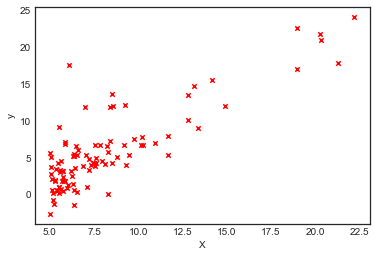

In [15]:
data.plot(kind='scatter',x='X',y='y',color='r',marker='x')
plt.show()

In [16]:
m = len(data)
X = np.array([np.ones((m)), np.array(data.X)]).T # 97x2
y = np.array(data.y).reshape(m, 1) # 97x1
theta = np.array([0,0]).reshape((2,1)) # 2x1
theta = theta.astype('float64')
num_iters = 1500;
alpha = 0.01;

In [17]:
def J(X, y, theta):
    m = len(y)
    sqr_stderr = (np.dot(X,theta) - y)**2 # 97x1
    return 1/(2*m) * sum(sqr_stderr) 

In [18]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    for i in range(0, num_iters):
        stderr = np.dot(X,theta) - y # 97x1
        theta[0] = theta[0] - alpha * 1/m * sum(stderr)
        theta[1] = theta[1] - alpha * 1/m * sum([se*x for se,x in zip(stderr,X[:,1])])
    
    return theta

In [19]:
# example of computing cost for theta(0,0)
print(J(X, y, theta))

[32.07273388]


In [20]:
min_param = gradient_descent(X, y, theta, alpha, num_iters)
print(min_param)

[[-3.63029144]
 [ 1.16636235]]


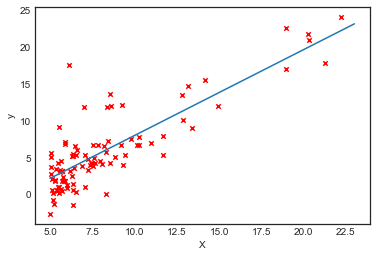

In [21]:
def f(min_param, x):
    return min_param[0] + min_param[1]*x

Xs = np.linspace(5,23,1000)
predicted = [f(min_param, x) for x in Xs]

data.plot(kind='scatter',x='X',y='y',color='r',marker='x')
plt.plot(Xs,predicted)
plt.show()